In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [85]:
df=pd.read_csv('C:\MySQLite_DataBase\ibm-hr-analytics-employee-attrition-performance.csv')

In [86]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [87]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [88]:
df.shape

(1470, 35)

In [89]:
df.shape[0]

1470

In [90]:
df.shape[1]

35

In [91]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [92]:
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [93]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,...,4,80,0,28,3,2,21,16,7,9
290,49,No,Travel_Frequently,636,Research & Development,10,4,Life Sciences,1,396,...,4,80,0,22,4,3,3,2,1,2
1067,47,No,Travel_Rarely,571,Sales,14,3,Medical,1,1503,...,3,80,1,11,4,2,5,4,1,2


# Missing Values Treatment

In [94]:
df.info()  # no null or Nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [95]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

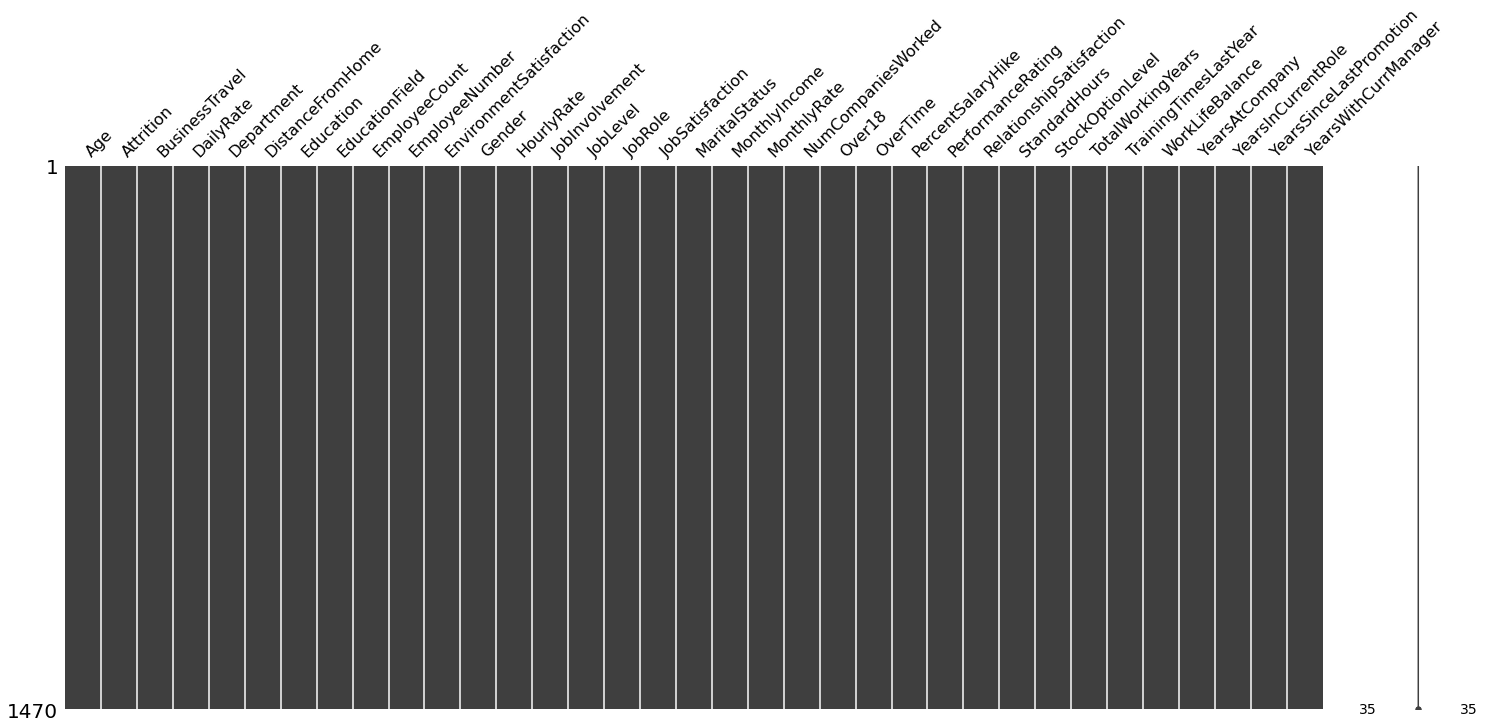

In [96]:
msno.matrix(df) # just to visualize.

In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

Hence this is a Binary Classification problem.

# Univariate Analysis

In [97]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features.

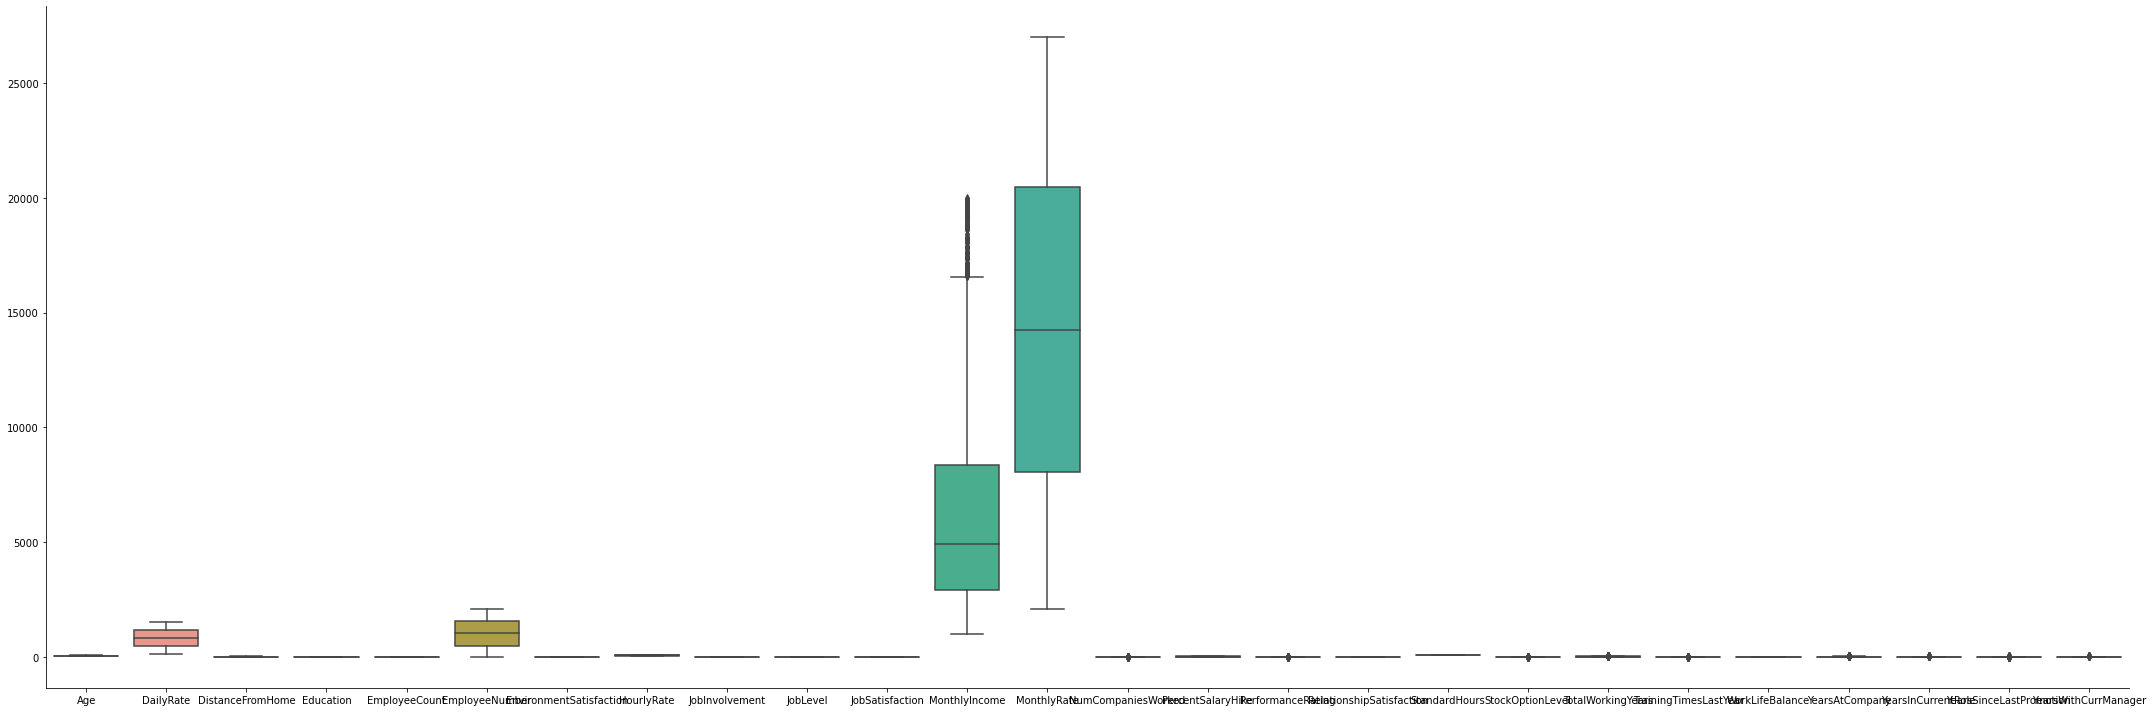

In [98]:
sns.factorplot(data=df,kind='box',size=10,aspect=3)


Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

We can also plot a kdeplot showing the distribution of the feature. Below I have plotted a kdeplot for the 'Age' feature. Similarly we plot for other numeric features also. We can also use a distplot from seaborn library.

<AxesSubplot:xlabel='Age', ylabel='Density'>

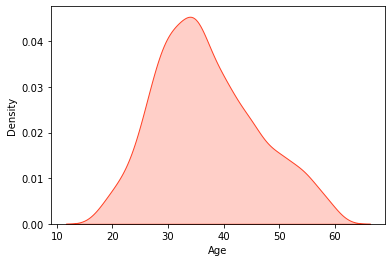

In [99]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

<AxesSubplot:xlabel='Age', ylabel='Density'>

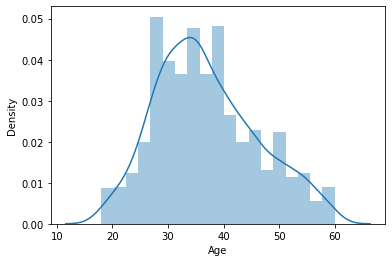

In [100]:
sns.distplot(df['Age'])


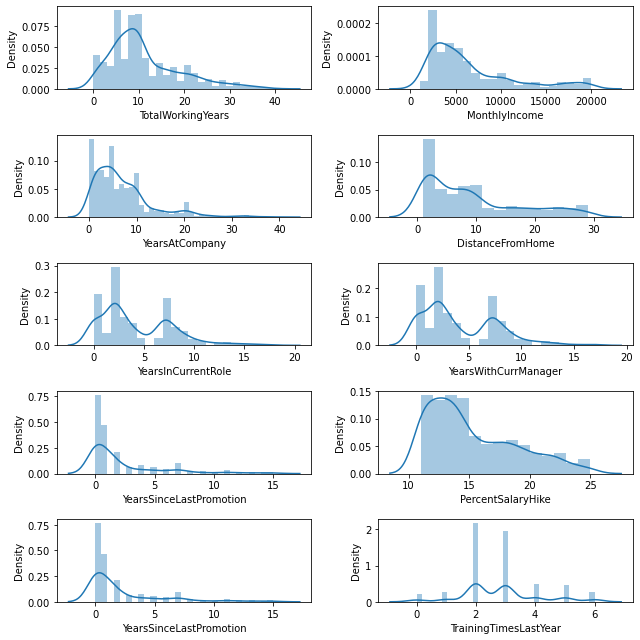

In [101]:

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features.

In [102]:
cat_df=df.select_dtypes(include='object')


In [103]:
cat_df.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [104]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)



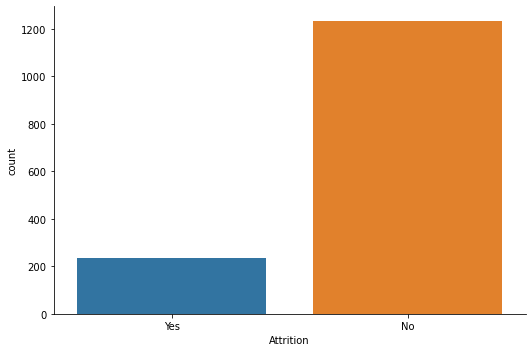

In [105]:
plot_cat('Attrition')   


Note that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques.

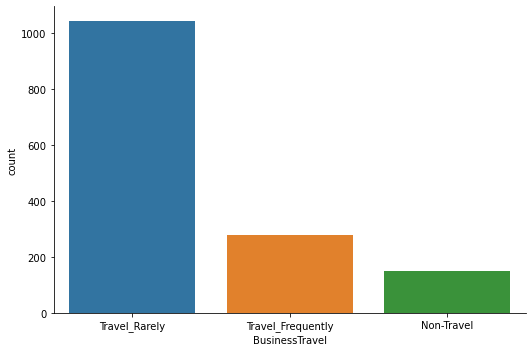

In [106]:
plot_cat('BusinessTravel')   


The above plot clearly shows that most of the people belong to the 'Travel_Rarely' class. This indicates that most of the people did not have a job which asked them for frequent travelling.

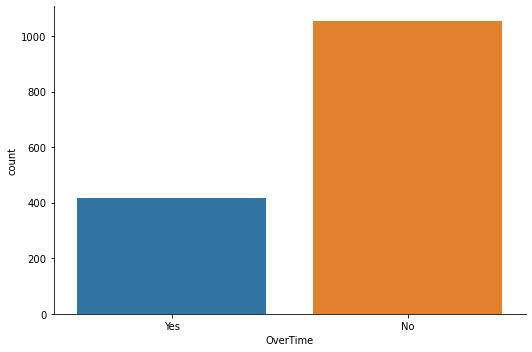

In [107]:
plot_cat('OverTime')

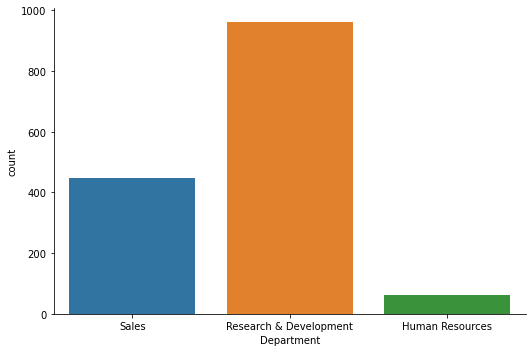

In [108]:
plot_cat('Department')  


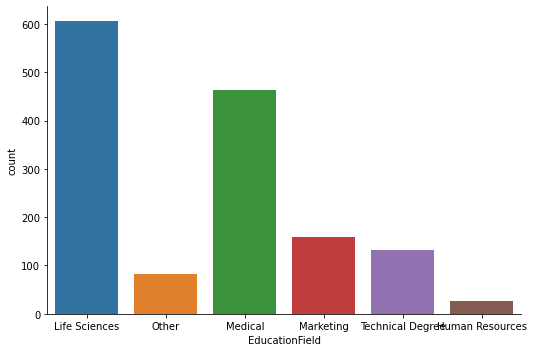

In [109]:
plot_cat('EducationField')


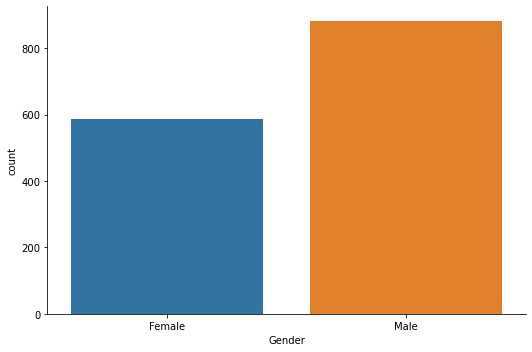

In [110]:
plot_cat('Gender') 


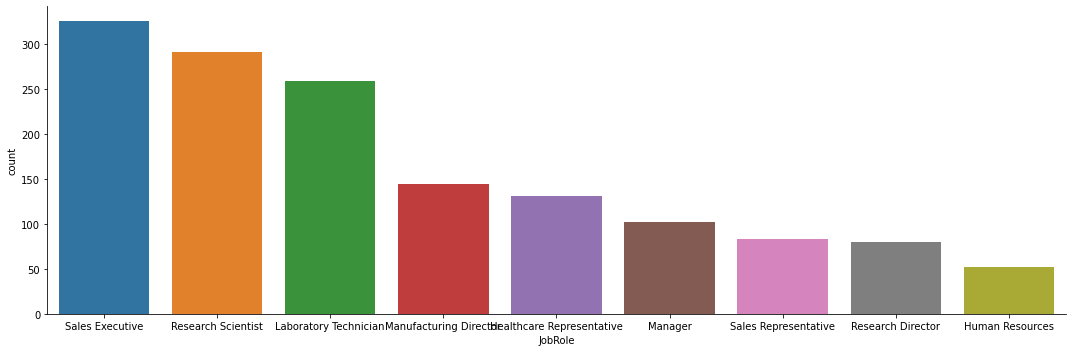

In [111]:
plot_cat('JobRole')

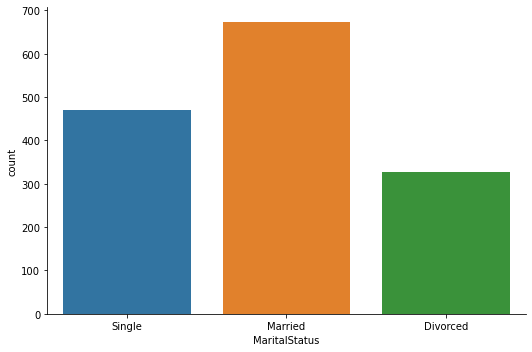

In [112]:
plot_cat('MaritalStatus')

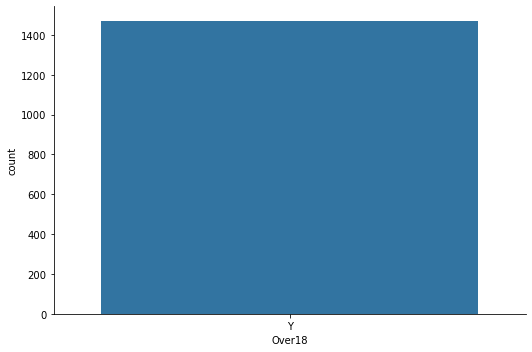

In [113]:
plot_cat('Over18')

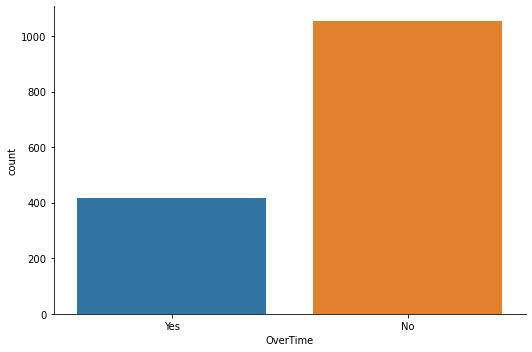

In [114]:
plot_cat('OverTime')

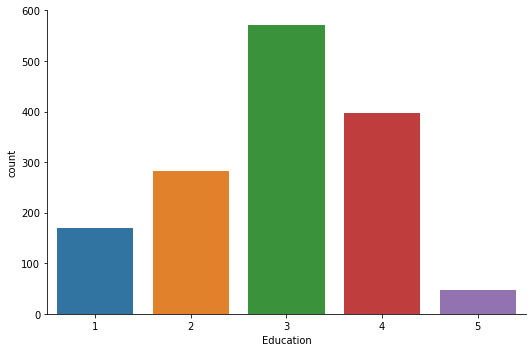

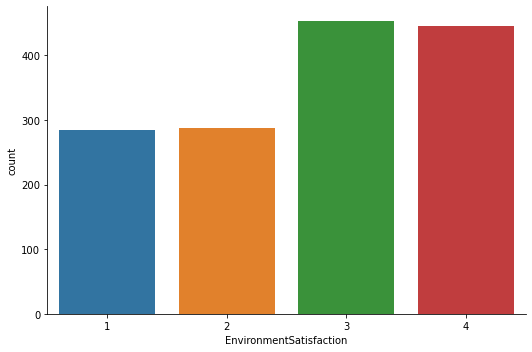

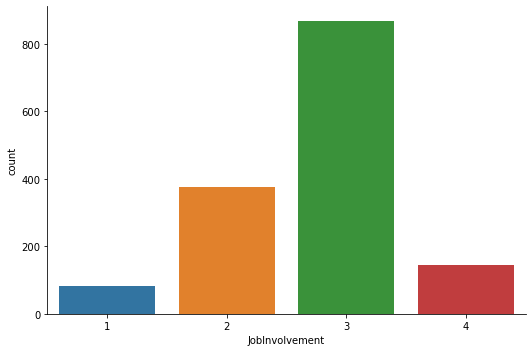

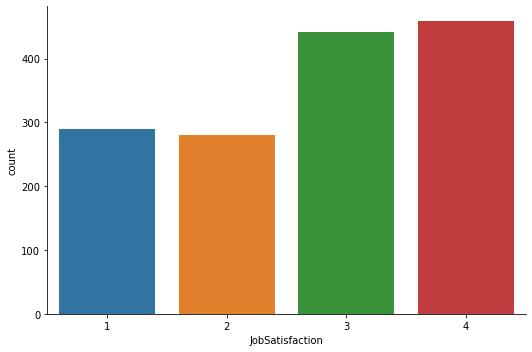

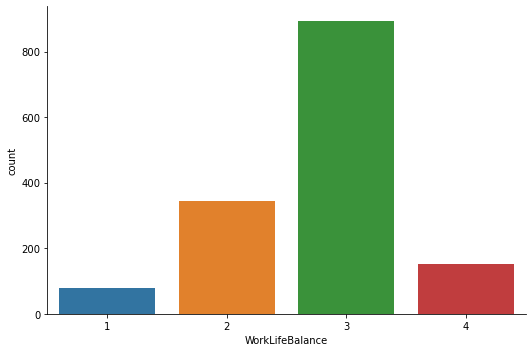

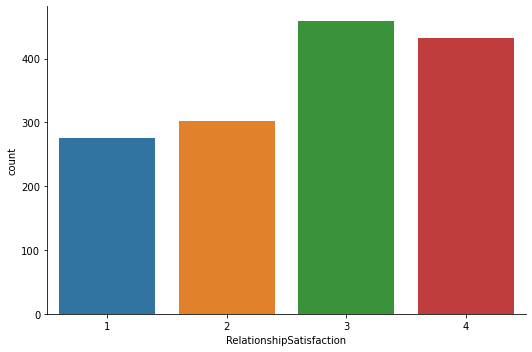

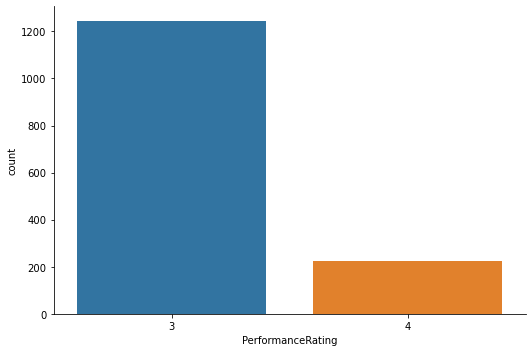

In [115]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_cat(i)


# Corelation b/w Features   


<AxesSubplot:>

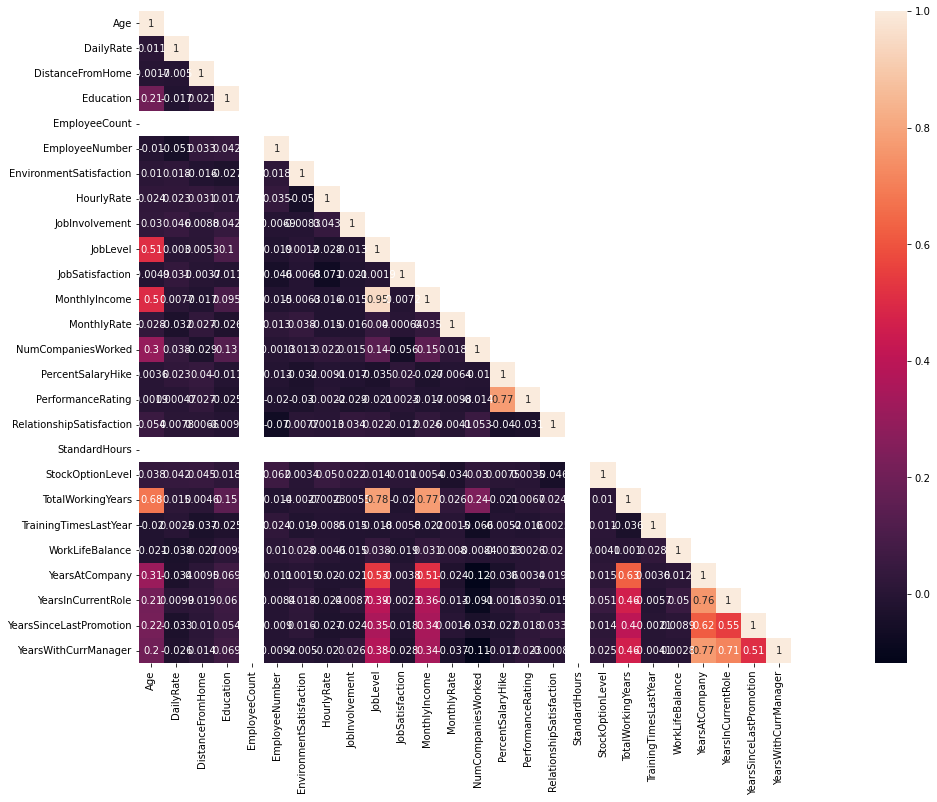

In [116]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)


SOME INFERENCES FROM THE ABOVE HEATMAP

Self relation ie of a feature to itself is equal to 1 as expected.

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.


In [117]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Feature Selection


# Plotting the Features against the 'Target' variable.

Age

Note that Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot


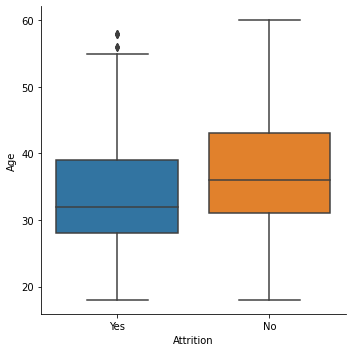

In [120]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')


Note that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.


# Department

Note that both Attrition(Target) as well as the Deaprtment are categorical.

In [122]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

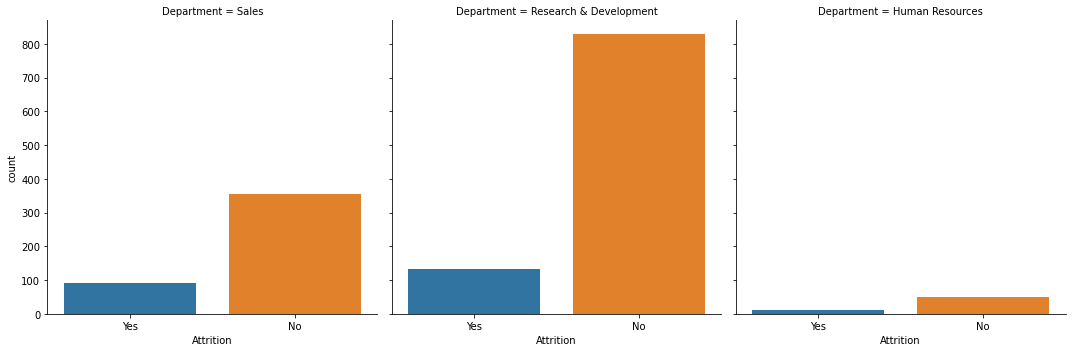

In [123]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')


In [124]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') 


Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Note that most of the observations corresspond to 'No' as we saw previously also. About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave. 

# Gender

In [125]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') 

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


About 85 % of females want to stay in the organisation while only 15 % want to leave the organisation. All in all 83 % of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

# Job Level


In [126]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')


Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.


# Monthly Income


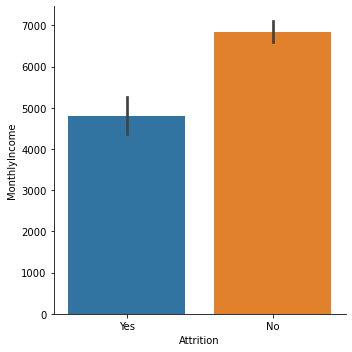

In [127]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')


# Job Satisfaction


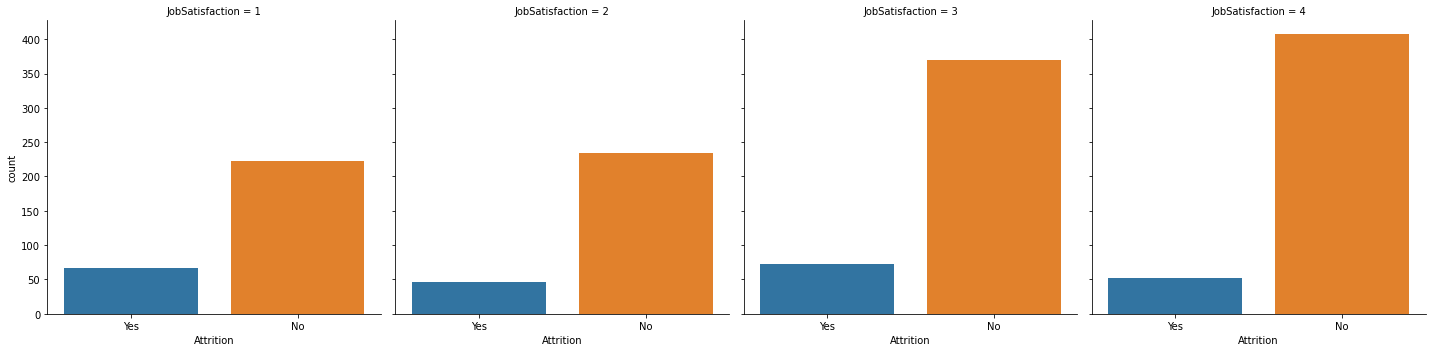

In [128]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')


In [129]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')


Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Note this shows an interesting trend. Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

# Environment Satisfaction

In [130]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.


# Job Involvement


In [131]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')


Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


# Work Life Balance


In [132]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')


Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


# RelationshipSatisfaction

In [133]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')


Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Notice that I have plotted just some of the important features against out 'Target' variable i.e. Attrition in our case. Similarly we can plot other features against the 'Target' variable and analye the trends i.e. how the feature effects the 'Target' variable.

# Feature Selection


In [134]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

# Prepraring dataset

I have used the Label Encoder from the scikit library to encode all the categorical features.Y

In [135]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [136]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [137]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [138]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


# Feature Scaling

In [187]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
x=scaled_df

In [188]:
x.shape

(1470, 23)

In [189]:
y=df.iloc[:,1]

In [190]:
y.shape

(1470,)

In [197]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# Handling the Imbalanced dataset


Note that we have a imbalanced dataset with majority of observations being of one type ('NO') in our case. In this dataset for example we have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset.Y=to_categorical(Y)


In [198]:
from imblearn.over_sampling import SMOTE

In [199]:
smt=SMOTE()
x_train,y_train=smt.fit_resample(x,y)

In [201]:
y.value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

In [202]:
y_train.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

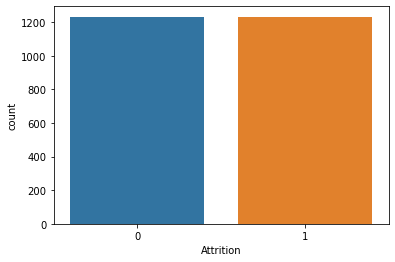

In [204]:
sns.countplot(y_train)

In [205]:
x_train.shape

(2466, 23)

In [206]:
y_train.shape

(2466,)

In [207]:
x_test.shape

(368, 23)

In [208]:
y_test.shape

(368,)

# model building

In [210]:
lr=LogisticRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'the model perform very well')
        print('At random state',i)
        print('Training accuracy score is:-',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is :-',round(accuracy_score(y_test,pred_test)*100,1),'\n\n')

At random state 14 the model perform very well
At random state 14
Training accuracy score is:- 87.1
Testing accuracy score is :- 87.1 


At random state 36 the model perform very well
At random state 36
Training accuracy score is:- 87.4
Testing accuracy score is :- 87.4 


At random state 242 the model perform very well
At random state 242
Training accuracy score is:- 87.1
Testing accuracy score is :- 87.1 


At random state 384 the model perform very well
At random state 384
Training accuracy score is:- 87.1
Testing accuracy score is :- 87.1 


At random state 538 the model perform very well
At random state 538
Training accuracy score is:- 86.7
Testing accuracy score is :- 86.7 


At random state 590 the model perform very well
At random state 590
Training accuracy score is:- 87.1
Testing accuracy score is :- 87.1 


At random state 652 the model perform very well
At random state 652
Training accuracy score is:- 87.4
Testing accuracy score is :- 87.4 


At random state 760 the model p

# Splitting the data into training and Testing sets:

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=36)

# Logistic Regression

In [213]:
lr.fit(x_train,y_train)

LogisticRegression()

In [214]:
pred_train=lr.predict(x_train)

In [215]:
pred_test=lr.predict(x_test)

In [216]:
accuracy_score(y_train,pred_train)

0.8774954627949183

In [217]:
accuracy_score(y_test,pred_test)

0.8722826086956522

In [219]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.69      0.37      0.48        59

    accuracy                           0.87       368
   macro avg       0.79      0.67      0.71       368
weighted avg       0.86      0.87      0.86       368



# Cross-validation on logistic regression

In [220]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)

In [221]:
lss

0.8722826086956522

In [222]:
for j in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc=lsscore.mean()
    print('At cv:-',j)
    print('Cross validation score is',lsc*100)
    print('accuracy_score is :-',lss*100)
    print('\n')

[0.88315217 0.85869565 0.83923706 0.86920981]
At cv:- 4
Cross validation score is 86.25736731429924
accuracy_score is :- 87.22826086956522


[0.8707483  0.86734694 0.86054422 0.8537415  0.8707483 ]
At cv:- 5
Cross validation score is 86.4625850340136
accuracy_score is :- 87.22826086956522


[0.88979592 0.86530612 0.87346939 0.84081633 0.85714286 0.86122449]
At cv:- 6
Cross validation score is 86.46258503401361
accuracy_score is :- 87.22826086956522


[0.88571429 0.86190476 0.86666667 0.86190476 0.84285714 0.86190476
 0.86190476]
At cv:- 7
Cross validation score is 86.3265306122449
accuracy_score is :- 87.22826086956522


[0.88586957 0.875      0.85326087 0.85869565 0.83152174 0.86413043
 0.87431694 0.85245902]
At cv:- 8
Cross validation score is 86.19067771442147
accuracy_score is :- 87.22826086956522


[0.88414634 0.86585366 0.8597561  0.86503067 0.86503067 0.85276074
 0.8404908  0.89570552 0.84662577]
At cv:- 9
Cross validation score is 86.39333632600129
accuracy_score is :- 87.22826

Since cross val accuracy score are almost same,we are handling with good approch.

In [224]:
lsscore_selected = cross_val_score(lr,x,y,cv=6).mean()
print('The cv score is :',lsscore_selected,'\nThe accuracy score is :',lss)

The cv score is : 0.8646258503401362 
The accuracy score is : 0.8722826086956522


In [225]:
from sklearn.metrics import confusion_matrix

In [226]:
lr

LogisticRegression()

# Right model selection

In [231]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train = algorithm_instance.predict(x_train)
    model_1_pred_test = algorithm_instance.predict(x_test)
    print('accuracy of the training model:',accuracy_score(y_train,model_1_pred_train))
    print('accuracy score of the test data',accuracy_score(y_test,model_1_pred_test))
    print('classification report for test data \n ',classification_report(y_test,model_1_pred_test))
    print('classification report for train data \n ',classification_report(y_train,model_1_pred_train))
    print('confusion_matrix: \n :',confusion_matrix(y_test,model_1_pred_test))
    

In [232]:
model_selection(lr,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.8774954627949183
accuracy score of the test data 0.8722826086956522
classification report for test data 
                precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.69      0.37      0.48        59

    accuracy                           0.87       368
   macro avg       0.79      0.67      0.71       368
weighted avg       0.86      0.87      0.86       368

classification report for train data 
                precision    recall  f1-score   support

           0       0.89      0.98      0.93       924
           1       0.77      0.35      0.48       178

    accuracy                           0.88      1102
   macro avg       0.83      0.66      0.70      1102
weighted avg       0.87      0.88      0.86      1102

confusion_matrix: 
 : [[299  10]
 [ 37  22]]


# DecisionTreeClassifier

In [233]:
dt=DecisionTreeClassifier()

In [234]:
model_selection(dt,x_train,y_train,x_test,y_test)

accuracy of the training model: 1.0
accuracy score of the test data 0.8070652173913043
classification report for test data 
                precision    recall  f1-score   support

           0       0.88      0.89      0.89       309
           1       0.39      0.36      0.37        59

    accuracy                           0.81       368
   macro avg       0.63      0.62      0.63       368
weighted avg       0.80      0.81      0.80       368

classification report for train data 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

confusion_matrix: 
 : [[276  33]
 [ 38  21]]


# SVC

In [235]:
svc=SVC()

In [236]:
model_selection(svc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.8992740471869328
accuracy score of the test data 0.8641304347826086
classification report for test data 
                precision    recall  f1-score   support

           0       0.87      0.99      0.92       309
           1       0.76      0.22      0.34        59

    accuracy                           0.86       368
   macro avg       0.82      0.60      0.63       368
weighted avg       0.85      0.86      0.83       368

classification report for train data 
                precision    recall  f1-score   support

           0       0.90      0.99      0.94       924
           1       0.94      0.40      0.56       178

    accuracy                           0.90      1102
   macro avg       0.92      0.70      0.75      1102
weighted avg       0.90      0.90      0.88      1102

confusion_matrix: 
 : [[305   4]
 [ 46  13]]


# RandomForestClassifier

In [301]:
rfc = RandomForestClassifier()

In [303]:
model_selection(rfc,x_train,y_train,x_test,y_test)

accuracy of the training model: 1.0
accuracy score of the test data 0.8559782608695652
classification report for test data 
                precision    recall  f1-score   support

           0       0.86      0.98      0.92       309
           1       0.69      0.19      0.29        59

    accuracy                           0.86       368
   macro avg       0.78      0.59      0.61       368
weighted avg       0.84      0.86      0.82       368

classification report for train data 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       924
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

confusion_matrix: 
 : [[304   5]
 [ 48  11]]


best model selection because it has given good accuracy score

# KNeighborsClassifier

In [237]:
knc =KNeighborsClassifier()

In [238]:
model_selection(knc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.8856624319419237
accuracy score of the test data 0.842391304347826
classification report for test data 
                precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.53      0.15      0.24        59

    accuracy                           0.84       368
   macro avg       0.69      0.56      0.57       368
weighted avg       0.80      0.84      0.80       368

classification report for train data 
                precision    recall  f1-score   support

           0       0.89      0.99      0.94       924
           1       0.86      0.35      0.50       178

    accuracy                           0.89      1102
   macro avg       0.87      0.67      0.72      1102
weighted avg       0.88      0.89      0.86      1102

confusion_matrix: 
 : [[301   8]
 [ 50   9]]


# GradientBoostingClassifier

In [242]:
Gbc = GradientBoostingClassifier()

In [244]:
model_selection(Gbc,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.9464609800362976
accuracy score of the test data 0.8641304347826086
classification report for test data 
                precision    recall  f1-score   support

           0       0.89      0.96      0.92       309
           1       0.63      0.37      0.47        59

    accuracy                           0.86       368
   macro avg       0.76      0.67      0.70       368
weighted avg       0.85      0.86      0.85       368

classification report for train data 
                precision    recall  f1-score   support

           0       0.94      0.99      0.97       924
           1       0.96      0.70      0.81       178

    accuracy                           0.95      1102
   macro avg       0.95      0.85      0.89      1102
weighted avg       0.95      0.95      0.94      1102

confusion_matrix: 
 : [[296  13]
 [ 37  22]]


# GaussianNB

In [245]:
GNB = GaussianNB()

In [246]:
model_selection(GNB,x_train,y_train,x_test,y_test)

accuracy of the training model: 0.7586206896551724
accuracy score of the test data 0.7554347826086957
classification report for test data 
                precision    recall  f1-score   support

           0       0.90      0.80      0.85       309
           1       0.34      0.54      0.42        59

    accuracy                           0.76       368
   macro avg       0.62      0.67      0.63       368
weighted avg       0.81      0.76      0.78       368

classification report for train data 
                precision    recall  f1-score   support

           0       0.93      0.77      0.84       924
           1       0.37      0.67      0.47       178

    accuracy                           0.76      1102
   macro avg       0.65      0.72      0.66      1102
weighted avg       0.83      0.76      0.78      1102

confusion_matrix: 
 : [[246  63]
 [ 27  32]]


# GridSearchCV

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [290]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  

In [291]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 

In [295]:
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear']},
             verbose=3)

In [296]:
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(x_test)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [297]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       309
           1       0.76      0.32      0.45        59

    accuracy                           0.88       368
   macro avg       0.82      0.65      0.69       368
weighted avg       0.86      0.88      0.85       368



# AUC ROC Curve :

In [262]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

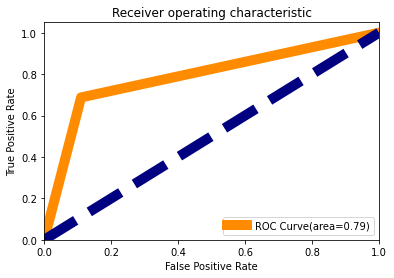

In [263]:
fpr,tpr,threshold = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1], [0,1], color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

since the model without outliers performing well we will select that dataframe

# model seving

In [269]:
import pickle

In [271]:
filename='inhouse diabetes.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [272]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted},index=range(len(a)))

In [277]:
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
363,0,1
364,0,0
365,0,0
366,0,0
